# Plot some neural net activation functions and their derivatives
Based on sec 4.1 of
 http://d2l.ai/chapter_multilayer-perceptrons/mlp.html


In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
!mkdir figures

mkdir: cannot create directory ‘figures’: File exists


In [ ]:
#!wget https://raw.githubusercontent.com/d2l-ai/d2l-en/master/d2l/torch.py -q -O d2l.py
# import d2l

In [ ]:
x = jnp.arange(-4.0, 4.0, 0.1)
partial_leaky_relu = lambda x: jax.nn.leaky_relu(x, negative_slope=0.1)

fns = [
    jax.nn.sigmoid,
    # jax.nn.relu,
    partial_leaky_relu,
    jax.nn.elu,
    jax.nn.swish,
    jax.nn.gelu,
]

names = [
    "sigmoid",
    #'relu',
    "leaky-relu",
    "elu",
    "swish",
    "gelu",
]

# evaluate functions and their gradients on a grid of points
fdict, gdict = {}, {}

for fn, name in zip(fns, names):
    y = fn(x)
    grad_fn = jax.grad(lambda x: fn(x))
    grads = jax.vmap(grad_fn)(x)

    fdict[name] = y  # vector of fun
    gdict[name] = grads  # gradient wrt x(i)

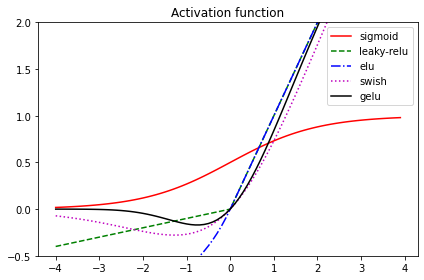

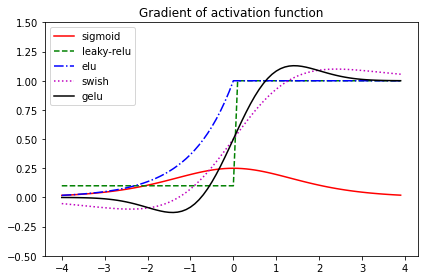

In [ ]:
# Plot the funcitons
styles = ["r-", "g--", "b-.", "m:", "k-"]
ax = plt.subplot()
for i, name in enumerate(names):
    lab = f"{name}"
    ax.plot(x, fdict[name], styles[i], label=lab)
ax.set_ylim(-0.5, 2)
ax.legend()
plt.title("Activation function")
plt.tight_layout()
plt.savefig(f"figures/activation-funs.pdf", dpi=300)
plt.show()

ax = plt.subplot()
for i, name in enumerate(names):
    lab = f"{name}"
    ax.plot(x, gdict[name], styles[i], label=lab)
ax.set_ylim(-0.5, 1.5)
ax.legend()
plt.title("Gradient of activation function")
plt.tight_layout()
plt.savefig(f"figures/activation-funs-grad.pdf", dpi=300)
plt.show()

In [ ]:
!ls figures

activation-funs-grad.pdf  activation-funs.pdf
